<span style="font-size: 28px;"> __Machine Learning Workshp 6 : Dimensionality Reduction__.</span>
<br>
<br>
<div style="text-align: center;">
<span style="font-size: 22px;"> Welecome to our sixth workshop! </span> </div>

In this workshop we will investigate the fundamentals of the __Dimensionality Reduction__ and how to apply its concept through Principal Component Analysis.

# The wine dataset
It is a classic and very easy __multi-class__ classification dataset.
It consists of __three (3)__ classes, __178 total instances__ and __13 real, positive__ features:
1. It is commonly associated with the __UCL Machine Learning Repository__.
1. The classes represent __three different types__ of wine.
1. There are __13 different chemical measurements (features)__ describing each wine sample in terms of alcohol content, malic acid concentration, color intensity, etc.
1. The dataset typically consists of __178 samples__, with each sample corresponding to one bottle of wine.
1. Typically, the data in the wine dataset is __preprocessed__ by __standardizing__ the features to have __zero mean__ and __unit variance__. This preprocessing step __ensures__ that each __feature contributes equally__ to the analysis.

__Return Arguments:__
1. __data__ as ndarray/dataframe of shape $(178,13)$
1. __target__ as ndarray/series of shape $(178,)$
1. __feature_names__ as a list of the names of the dataset columns

You could load and use the __wine dataset__ as follows:
```python
from sklearn.datasets import load_wine
# Load the Wine dataset
wine = load_wine()
data = wine.data
target = wine.target
feature_names = wine.feature_names
```

The __data pre-processing / standardization__ is being performed as follows:
```python
# Standardize the data (mean=0, variance=1)
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
data_standardized = (data - mean) / std_dev
```

# Principal Component Analysis / PCA
1. It is a class belonging to the __```sklearn.decomposition```__.
1. it performs __linear dimensionality reduction__ using __Singular Value Decomposition / SVD of the data to __project__ it to a __lower dimensional__ space.
<br>
<br>
Its __key parameters__ are:
1. __`n_components1:__ This parameter specifies the number of principal components to retain. You can set it to an integer or a float between 0.0-1.0, indicating the __desired variance__ explained.
1. __`whiten`:__ When set to __'True'__. it whitens the data (decorrelates features) during the transformation.

Its __output arguments__ are:
1. __`components_`:__ This attribute contains the principal components themselves as row vectors.
1. __`explained variance ratio_`:__ This attribute provides the ratio of variance explained by each of the selected components.

Its __methods__ are:
1. __`fit(X)`:__This method computes the principal components for the input data __`X`__.
1. __`transform(X)`:__ It transforms the input data __`X`__ into the new coordinate system defined by the __principal components__.
1. __`inverse_transform(X_reduced)`:__ This method allows you to transform reduced data back to the original feature space.

__Useful Hint:__ We can use the __`fit`__ and __`transform`__ methods of PCA simultaneously, when we want to __perform dimensionality reduction__ and __obtain the transformed data__ in __one step__. The __`fit_transform`__ method is available for this purpose, combining the __fitting and transformation steps__ into a __single call__as follows:
```python
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit and transform the data in one step
X_reduced = pca.fit_transform(X)
```

# 3D Visualization of the Principal Components
The __`mpl_toolkits.mplot3d`__ module includes classes and functions for creating various types of 3D plots. We import the __`Axes3D`__ class from the __`mpl_toolkits.mplot3d`__ module. This class is used to __create 3D axes__ for three-dimensional plots:
```python
from mpl_toolkits.mplot3d import Axes3D
```
The following line of code is used to create a new figure with size of 8 inches in width and 6 inches in height:
```python
plt.figure(figsize=(8, 6))
```
The __```plt.figure()```__ function is used to __create a new figure__ for the plot.
The __```figsize```__ allows you to set the dimensions of the figure.

Then, a list called __```colors```__ is created, which contains three color codes. These colors will be used to distinguish data points for different classes in the 3D scatter plot:
```python
colors = ['r', 'g', 'b']
```

Finally, the __```wine.target_names```__ variable contains the class labels or names for the data points in the wine dataset. It __represents__ the different types of wine. This line assigns these class names to the __```targets```__ variable:
```python
targets = wine.target_names
```
The __```plt.figure()```__ function creates a new, empty figure which is the basis for our visualization.
The __```ax```__ is a variable that represents the subplot(axis) you are adding to the figure. It's often referred to as the __`axes`__ object. This is where you will create and customize your 3D plot.

The __```ax = fig.add_subplot(111, projection='3d')```__ is used to add the 3D subplot:
1. The __```111```__ part specifies that you are adding a subplot in a grid with one row, one column and it is the first (and only) subplot.
1. The __```projection='3d' ```__ part tells Matplotlib that the subplot should be in 3D projection, which is necessary for creating 3D plots. The __`projection`__ parameter is set to __`3D`__ to enable 3D plotting capabilities. 

# How to create a 3D scatter plot for visualizing the principal components
1. Firstly, we initiate a __`for loop`__ that iterates over pairs of __`target`__ and __`color`__ obtained by __zipping__ two __lists__: __`targets`__ and __`colors`__. The `targets`__ list contains the target class names and __`colors`__ list contains the corresponding colors for the scatter plot.
```python
for target, color in zip(targets, colors):
```
1. The line __```indices_to_keep = reduced_df['Target'] == wine.target_names.tolist().index(target)```__ creates a boolean mask __```indices_to_keep```__ that is __`True`__ for rows in the DataFrame __`reduced_df`__, where the __`Target`__ column (the original class labels) matches the index of the current __`target`__ class in the list of class names __`wine.target_names`__. It helps filter the data points belonging to the current target class.
1. The following lines generate a scatter plot for the data points belonging to the current __`target`__ class. It uses the 3D axes __`ax`__ for plotting: 
```python
reduced_df = pd.DataFrame(data=reduced_data, columns=('PC1', 'PC2', 'PC3'))
ax.scatter(reduced_df.loc[indices_to_keep, 'PC1'],
                reduced_df.loc[indices_to_keep, 'PC2'],
                reduced_df.loc[indices_to_keep, 'PC3'],
                c=color,
                label=target)
```
1. The code segment 
```python
reduced_df.loc[indices_to_keep, 'PC1'],
                reduced_df.loc[indices_to_keep, 'PC2'],
                reduced_df.loc[indices_to_keep, 'PC3'],
```
select the data points (PC1, PC2, and PC3) for the current target class using the boolean mask __`indices_to_keep`__.
1. The __`c=color`__ specifies the color of the points.
1. The __`label=target`__ provides a label for the legend.

# Exercise 1
In this exercise you will use the code and knowledge from the aforementioned cells to perform dimensionality reduction in the Wine Dataset. More specifically, you will perform the following steps:
1. Load the Wine dataset and differentiate the features and the output in the variables __`data`__ and __`target`__ respectively.
1. Then standardize the data so as to have zero mean value and unit variance.
1. Declare an object of the PCA class from the sklearn.decomposition. This model will be initialized so as to retain 3 components.
1. Then use the __`fit_transform()`__ function to fit and transform the data to a new __`reduced_data`__ function.
1. Then create a __`reduced_df`__ DataFrame to visualize the reduced data. 
1. Once you created the DataFrame, you should add now the target variable to the DataFrame.
1. Then, plot this DataFrame in 3D (You may use the previous code for this).
1. Estimate the explained variance ratio by using the __`explained_variance_ratio`__ attribute.
1. Print the explained variance ratio for each component and the total variance explained.

In [9]:
# 1. Load the Wine dataset and differentiate the features and the output in the variables data and target respectively.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

wine = load_wine()

data = wine.data
target = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

In [13]:
# 2. Then standardize the data so as to have zero mean value and unit variance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [14]:
# 3. Declare an object of the PCA class from the sklearn.decomposition. This model will be initialized so as to retain 3 components.
n_components = 3
pca = PCA(n_components=n_components)

In [15]:
# 4. Then use the fit_transform() function to fit and transform the data to a new reduced_data function.
reduced_data = pca.fit_transform(data_scaled)

In [17]:
# 5. Then create a reduced_df DataFrame to visualize the reduced data.
reduced_df = pd.DataFrame(data=reduced_data, columns=('PC1', 'PC2', 'PC3'))
reduced_df['target'] = target

In [ ]:
# 6. Once you created the DataFrame, you should add now the target variable to the DataFrame.

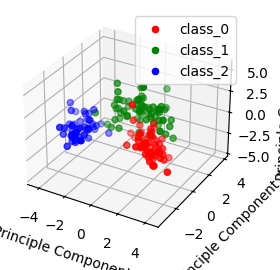

In [26]:
# 7. Then, plot this DataFrame in 3D (You may use the previous code for this).
fig = plt.figure(figsize=(3, 4))
colours = ['r', 'g', 'b']
ax = fig.add_subplot(111, projection='3d')

for t, col in zip(target_names, colours):
    indices_to_keep = reduced_df['target'] == target_names.tolist().index(t)
    ax.scatter(
        reduced_df.loc[indices_to_keep, 'PC1'],
        reduced_df.loc[indices_to_keep, 'PC2'],
        reduced_df.loc[indices_to_keep, 'PC3'],
        c=col,
        label=t
    )

ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')

plt.legend(target_names);

In [ ]:
# 8. Estimate the explained variance ratio by using the explained_variance_ratio attribute.

In [ ]:
# 9. Print the explained variance ratio for each component and the total variance explained.

# A goodbye Exercise
This is an __optional__ exercise and a way to thank you for your collaboration this year.
Although it is a __strange gift__, it serves to integrate the knowledge taught in a single exercise/project.
Hopefully, it would be a crash test for the succession of the lessons and workshops.
More specifically:
1. Load the Breast Cancer dataset from sklearn.datasets.
1. Split the dataset into training and testing sets
1. Train and evaluate k-NN and SVM models on the original data
1. Define a function to perform PCA and evaluate models
1. Evaluate and return results (accuracy, precision, recall, F1)
1. Compare the results before and after PCA
1. Display the results

# References
[UV Irvine Machine Learning Repository](https://archive.ics.uci.edu/)
<br>
[PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)